<div style="text-align: center;">
    <h1>Regression Problems: KNN regression</h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


In [32]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [37]:
class knn_regression:
  def __init__(self, k):
    self.k = k
    self.X = None
    self.y = None

  def fit(self, X, y):
    self.X = X
    self.y = y

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.dot(x1-x2, x1-x2))

  def predict_one(self, x):
    distances = np.array([[i, self.euclidean_distance(x, self.X[i])] for i in range(self.X.shape[0])])
    sorted_items = distances[distances[:, 1].argsort()]
    k_nearest_items = sorted_items[:self.k]
    k_nearest_idx = k_nearest_items[:, 0].astype(int)
    return np.mean(self.y[k_nearest_idx])

  def predict(self, X):
    y_pred = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
      y_pred[i] = self.predict_one(X[i])
    return y_pred


In [96]:
from scipy.spatial.distance import cdist

class opt_knn_regression:
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None

    def fit(self, X, y):
        # Convert to NumPy arrays with float type for consistency and performance
        self.X = np.asarray(X, dtype=float)
        self.y = np.asarray(y, dtype=float)

    def predict(self, X):
        # Ensure X is a NumPy array of floats
        X = np.asarray(X, dtype=float)
        # Compute distance matrix between all test points and training points
        distances = cdist(X, self.X, 'euclidean')
        # Find indices of k nearest neighbors for each test point
        nearest_idx = np.argpartition(distances, kth=self.k, axis=1)[:, :self.k]
        # Compute mean of y values for k nearest neighbors
        y_pred = np.mean(self.y[nearest_idx], axis=1)
        return y_pred

## Iris Dataset

In [38]:
from sklearn.datasets import load_iris

In [55]:
plt.close('all')
#iris dataset
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
K = 4
knn = knn_regression(K)
knn.fit(X_train, y_train)
y_pred = np.round(knn.predict(X_test),0).astype(int)

In [86]:
print('y_pred:', y_pred)
print('y_test:', y_test)

y_pred: [2 0 2 1 1 0 1 2 1 2 2 0 0 0 0 2 2 1 2 2 0 2 0 2 2 1 2 2 0 0]
y_test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Decision tree accuracy:  0.8333333333333334


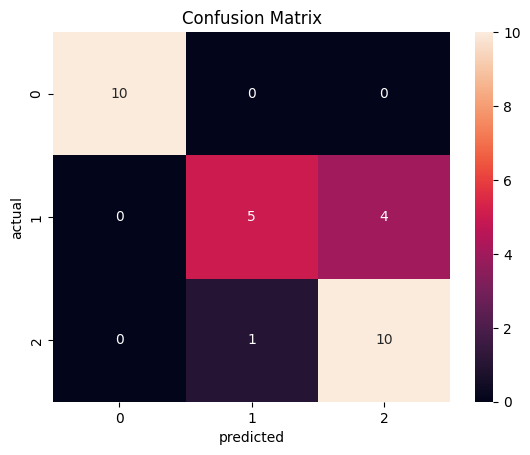

In [87]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("Decision tree accuracy: ", acc)

plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## California Housing Dataset

In [88]:
from sklearn.datasets import fetch_california_housing

In [89]:
# Load dataset
data_frame = fetch_california_housing()
data = data_frame.data
target = data_frame.target

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
clf = knn_regression(k= 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [93]:
print(y_pred)
print(y_test)

[0.4988   0.7646   4.750006 ... 4.761208 0.692    1.8944  ]
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [95]:
# Evaluate

print(f"Test MSE: {np.mean((y_test - y_pred) ** 2):.4f}")

Test MSE: 0.4324


In [97]:
opt_clf = opt_knn_regression(k= 5)
opt_clf.fit(X_train, y_train)
opt_y_pred = opt_clf.predict(X_test)

In [98]:
print(y_pred)
print(y_test)

[0.4988   0.7646   4.750006 ... 4.761208 0.692    1.8944  ]
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [99]:
# Evaluate

print(f"Test MSE: {np.mean((y_test - y_pred) ** 2):.4f}")

Test MSE: 0.4324


## Boston Housing Dataset

In [100]:
boston_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(boston_url)
X_bos = boston_df.drop("medv", axis=1).values
y_bos = boston_df["medv"].values

In [101]:
X_train, X_test, y_train, y_test =  train_test_split(X_bos, y_bos, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
clf = opt_knn_regression(k= 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [143]:
print(np.min(np.power(y_pred - y_test,2)))
print(np.max(np.power(y_pred - y_test,2)))

0.009999999999999573
642.6225000000001


In [145]:
# Evaluate
print(f"Test MSE: {np.mean((y_test - y_pred) ** 2):.4f}")

Test MSE: 16.1115
